# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** Neha Narula
**Student ID:** 2024ad05444

**Student Name:** Riya Narula 
**Student ID:** 2024ad05445

**Student Name:** Gayathri M
**Student ID:** 2024ad05192

**Student Name:** Rahul
**Student ID:** 2024ad05284

**Date:** 14-Dec-2025

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Track training time** for both models using `time.time()`\n
4. **Store loss_history** in both model classes
5. **Calculate ALL metrics** (accuracy, precision, recall, F1)
6. **Fill get_assignment_results()** with ALL required fields
7. **PRINT the results** - Auto-grader needs visible output!
8. **Run all cells** before submitting (Kernel → Restart & Run All)

**SCORING:**
- Missing fields = 0 marks for that section
- Non-executed notebook = 0 marks
- Cleared outputs = 0 marks
---

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

print("\n" + "="*80)
print(" RUNNING ALL THREE PROBLEMS: Regression + Binary Classification + Multi-class Classification ")
print("="*80 + "\n")

✓ Libraries imported successfully

 RUNNING ALL THREE PROBLEMS: Regression + Binary Classification + Multi-class Classification 



## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [15]:
# Loading dataset
data=pd.read_csv("house_rent.csv")

# Dataset information
dataset_name = "House Rent Prediction"
dataset_source = "Kaggle"
n_samples = 7691      # Total number of rows
n_features = 8     # Number of features (excluding target)
problem_type = "All 3(Regression, Binary Classification & Multi-Class Classification"

# Problem statement
problem_statement = """
The goal is to predict residential rental prices based on property attributes including
location, size, configuration, furnishing status, and area-specific rates.

This helps improve pricing transparency and supports informed decision-making in the
rental housing market.
"""

# Primary evaluation metric
primary_metric = "MAE(Regression) & F1(Binary Classification/Multi-Class Classification)"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification
metric_justification = """
MAE (Regression): MAE is used because it measures the average absolute difference between predicted and actual values, making errors easy to interpret.
F1-score (Classification): F1-score is used because it balances precision and recall, providing a robust evaluation.
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: House Rent Prediction
Source: Kaggle
Samples: 7691, Features: 8
Problem Type: All 3(Regression, Binary Classification & Multi-Class Classification
Primary Metric: MAE(Regression) & F1(Binary Classification/Multi-Class Classification)


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [16]:
print("Preprocessing data...")

# Drop the house_type description column
data_clean = data.drop('house_type', axis=1)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['locality', 'city', 'furnishing']

for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col].astype(str))
    label_encoders[col] = le

# Separate features
X = data_clean.drop('rent', axis=1).values
rent_values = data_clean['rent'].values

# Create three target versions
# 1. Regression target
y_regression = rent_values.reshape(-1, 1)

# 2. Binary classification target (High vs Low/Medium rent)
median_rent = np.median(rent_values)
y_binary = (rent_values > median_rent).astype(int).reshape(-1, 1)

# 3. Multiclass target (Low/Medium/High)
q33 = np.percentile(rent_values, 33)
q66 = np.percentile(rent_values, 66)
y_multiclass = np.zeros(len(rent_values), dtype=int)
y_multiclass[rent_values <= q33] = 0  # Low
y_multiclass[(rent_values > q33) & (rent_values <= q66)] = 1  # Medium
y_multiclass[rent_values > q66] = 2  # High
y_multiclass = y_multiclass.reshape(-1, 1)

print(f"\nTarget distributions:")
print(f"Regression: Min={rent_values.min():.0f}, Max={rent_values.max():.0f}, Mean={rent_values.mean():.0f}")
print(f"Binary: Low/Med={np.sum(y_binary==0)} (≤{median_rent:.0f}), High={np.sum(y_binary==1)} (>{median_rent:.0f})")
print(f"Multiclass: Low={np.sum(y_multiclass==0)}, Medium={np.sum(y_multiclass==1)}, High={np.sum(y_multiclass==2)}")

# Train-test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)
_, _, y_bin_train, y_bin_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
_, _, y_multi_train, y_multi_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_reg_train_scaled = scaler_y.fit_transform(y_reg_train)
y_reg_test_scaled = scaler_y.transform(y_reg_test)

train_samples = len(X_train)
test_samples = len(X_test)
print(f"\nTrain samples: {train_samples}, Test samples: {test_samples}")

# Fill these after preprocessing
train_samples = len(X_train)      # Number of training samples
test_samples = len(X_test)        # Number of test samples
train_test_ratio = 0.8  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Preprocessing data...

Target distributions:
Regression: Min=1000, Max=2700000, Mean=54795
Binary: Low/Med=3866 (≤28000), High=3825 (>28000)
Multiclass: Low=2565, Medium=2511, High=2615

Train samples: 6152, Test samples: 1539
Train samples: 6152
Test samples: 1539
Split ratio: 80.0%


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [17]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, problem_type='regression'):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.problem_type = problem_type
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
    def fit(self, X, y):
        """
        Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape
        
        if self.problem_type == 'regression':
            self.weights = np.zeros((n_features, 1))
            self.bias = 0
            
            for i in range(self.n_iterations):
                y_pred = np.dot(X, self.weights) + self.bias
                loss = np.mean((y_pred - y) ** 2)
                self.loss_history.append(loss)
                
                dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (2 / n_samples) * np.sum(y_pred - y)
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        
        elif self.problem_type == 'binary':
            self.weights = np.zeros((n_features, 1))
            self.bias = 0
            
            for i in range(self.n_iterations):
                z = np.dot(X, self.weights) + self.bias
                y_pred = self.sigmoid(z)
                
                loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
                self.loss_history.append(loss)
                
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        
        else:  # multiclass
            n_classes = len(np.unique(y))
            self.weights = np.random.randn(n_features, n_classes) * 0.01
            self.bias = np.zeros((1, n_classes))
            
            y_onehot = np.zeros((n_samples, n_classes))
            y_onehot[np.arange(n_samples), y.flatten()] = 1
            
            for i in range(self.n_iterations):
                z = np.dot(X, self.weights) + self.bias
                y_pred = self.softmax(z)
                
                loss = -np.mean(np.sum(y_onehot * np.log(y_pred + 1e-8), axis=1))
                self.loss_history.append(loss)
                
                dz = (y_pred - y_onehot) / n_samples
                dw = np.dot(X.T, dz)
                db = np.sum(dz, axis=0, keepdims=True)
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

        return self

    def predict(self, X):
        """
        Prediction Implementation

        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        if self.problem_type == 'regression':
            return np.dot(X, self.weights) + self.bias
        elif self.problem_type == 'binary':
            z = np.dot(X, self.weights) + self.bias
            return (self.sigmoid(z) > 0.5).astype(int)
        else:
            z = np.dot(X, self.weights) + self.bias
            return np.argmax(self.softmax(z), axis=1).reshape(-1, 1)

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [18]:
# Train baseline model
print("=====================Training Baseline Model======================")
baseline_start = time.time()

# Regression Baseline
print("\n[1/6] Training Regression Baseline...")
# Initialize and train your baseline model
reg_baseline = BaselineModel(learning_rate=0.01, n_iterations=1000, problem_type='regression')
reg_baseline.fit(X_train_scaled, y_reg_train_scaled)

# Make predictions
reg_base_pred_scaled = reg_baseline.predict(X_test_scaled)
reg_base_pred = scaler_y.inverse_transform(reg_base_pred_scaled)
reg_base_time = time.time() - baseline_start

print(f"✓ Baseline training completed in {reg_base_time:.2f}s")
print(f"✓ Loss decreased from {reg_baseline.loss_history[0]:.4f} to {reg_baseline.loss_history[-1]:.4f}")

# Store loss explicitly
baseline_initial_loss = reg_baseline.loss_history[0]
baseline_final_loss = reg_baseline.loss_history[-1]

# Binary Baseline
print("\n[2/6] Training Binary Classification Baseline...")
start = time.time()
bin_baseline = BaselineModel(learning_rate=0.01, n_iterations=1000, problem_type='binary')
bin_baseline.fit(X_train_scaled, y_bin_train)

# Make predictions
bin_base_pred = bin_baseline.predict(X_test_scaled)
bin_base_time = time.time() - start

print(f"✓ Baseline training completed in {bin_base_time:.2f}s")
print(f"✓ Loss decreased from {bin_baseline.loss_history[0]:.4f} to {bin_baseline.loss_history[-1]:.4f}")

# Store loss explicitly
bin_base_initial_loss = bin_baseline.loss_history[0]
bin_base_final_loss = bin_baseline.loss_history[-1]


# Multiclass Baseline
print("\n[5/6] Training Multiclass Classification Baseline...")
start = time.time()
multi_baseline = BaselineModel(learning_rate=0.01, n_iterations=1000, problem_type='multiclass')
multi_baseline.fit(X_train_scaled, y_multi_train)

# Make predictions
multi_base_pred = multi_baseline.predict(X_test_scaled)
multi_base_time = time.time() - start

print(f"✓ Baseline training completed in {multi_base_time:.2f}s")
print(f"✓ Loss decreased from {multi_baseline.loss_history[0]:.4f} to {multi_baseline.loss_history[-1]:.4f}")

# Store loss explicitly
multi_base_initial_loss = multi_baseline.loss_history[0]
multi_base_final_loss = multi_baseline.loss_history[-1]


=====================Training Baseline Model======================

[1/6] Training Regression Baseline...
✓ Baseline training completed in 0.06s
✓ Loss decreased from 1.0000 to 0.4814

[2/6] Training Binary Classification Baseline...
✓ Baseline training completed in 0.19s
✓ Loss decreased from 0.6931 to 0.3948

[5/6] Training Multiclass Classification Baseline...
✓ Baseline training completed in 0.80s
✓ Loss decreased from 1.1098 to 0.6926


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [19]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000, problem_type='regression'):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.problem_type = problem_type
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        Initialize weights and biases for all layers

        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)
        for l in range(1, len(self.architecture)):
            self.parameters[f'W{l}'] = np.random.randn(
                self.architecture[l], 
                self.architecture[l-1]
            ) * np.sqrt(2.0 / self.architecture[l-1])
            self.parameters[f'b{l}'] = np.zeros((self.architecture[l], 1))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
        
    def forward_propagation(self, X):
        """
        Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        self.cache['A0'] = X.T
        L = len(self.architecture) - 1
        
        for l in range(1, L + 1):
            Z = np.dot(self.parameters[f'W{l}'], self.cache[f'A{l-1}']) + self.parameters[f'b{l}']
            self.cache[f'Z{l}'] = Z
            
            if l == L:
                if self.problem_type == 'regression':
                    self.cache[f'A{l}'] = Z
                elif self.problem_type == 'binary':
                    self.cache[f'A{l}'] = self.sigmoid(Z)
                else:
                    self.cache[f'A{l}'] = self.softmax(Z)
            else:
                self.cache[f'A{l}'] = self.relu(Z)
        
        return self.cache[f'A{L}'].T

    def backward_propagation(self, X, y):
        """
        Implement backward pass to compute gradients

        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[0]
        L = len(self.architecture) - 1
        grads = {}
        
        if self.problem_type == 'regression':
            dZ = (self.cache[f'A{L}'] - y.T) / m
        elif self.problem_type == 'binary':
            dZ = (self.cache[f'A{L}'] - y.T) / m
        else:
            n_classes = self.architecture[-1]
            y_onehot = np.zeros((m, n_classes))
            y_onehot[np.arange(m), y.flatten()] = 1
            dZ = (self.cache[f'A{L}'].T - y_onehot).T / m
        
        grads[f'dW{L}'] = np.dot(dZ, self.cache[f'A{L-1}'].T)
        grads[f'db{L}'] = np.sum(dZ, axis=1, keepdims=True)
        
        for l in range(L-1, 0, -1):
            dA = np.dot(self.parameters[f'W{l+1}'].T, dZ)
            dZ = dA * self.relu_derivative(self.cache[f'Z{l}'])
            grads[f'dW{l}'] = np.dot(dZ, self.cache[f'A{l-1}'].T)
            grads[f'db{l}'] = np.sum(dZ, axis=1, keepdims=True)
        
        return grads

    def update_parameters(self, grads):
        """
        Update weights and biases using gradients

        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        L = len(self.architecture) - 1
        for l in range(1, L + 1):
            self.parameters[f'W{l}'] -= self.lr * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * grads[f'db{l}']

    def compute_loss(self, y_pred, y_true):
        """
        Compute loss

        For regression: MSE
        For classification: Cross-entropy
        """
        m = y_true.shape[0]
        
        if self.problem_type == 'regression':
            loss = np.mean((y_pred - y_true) ** 2)
        elif self.problem_type == 'binary':
            # binary cross-entropy loss
            y_pred_clip = np.clip(y_pred, 1e-8, 1 - 1e-8)
            loss = -np.mean(y_true * np.log(y_pred_clip) + (1 - y_true) * np.log(1 - y_pred_clip))
        else:
            # Cross-Entropy Loss (For Multi Class)
            n_classes = self.architecture[-1]
            y_onehot = np.zeros((m, n_classes))
            y_onehot[np.arange(m), y_true.flatten()] = 1
            y_pred_clip = np.clip(y_pred, 1e-8, 1 - 1e-8)
            loss = -np.mean(np.sum(y_onehot * np.log(y_pred_clip), axis=1))
        
        return loss

    def fit(self, X, y):
        """
        Implement training loop

        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()
        
        for i in range(self.n_iterations):
            y_pred = self.forward_propagation(X)
            loss = self.compute_loss(y_pred, y)
            self.loss_history.append(loss)
            
            grads = self.backward_propagation(X, y)
            self.update_parameters(grads)
            
            if (i + 1) % 500 == 0:
                print(f"  Iteration {i+1}/{self.n_iterations}, Loss: {loss:.4f}")
        
        return self

    def predict(self, X):
        """
        Implement prediction

        Use forward_propagation and apply appropriate thresholding
        """
        self.cache['A0'] = X.T
        L = len(self.architecture) - 1
        
        for l in range(1, L + 1):
            Z = np.dot(self.parameters[f'W{l}'], self.cache[f'A{l-1}']) + self.parameters[f'b{l}']
            if l == L:
                if self.problem_type == 'regression':
                    self.cache[f'A{l}'] = Z
                elif self.problem_type == 'binary':
                    self.cache[f'A{l}'] = self.sigmoid(Z)
                else:
                    self.cache[f'A{l}'] = self.softmax(Z)
            else:
                self.cache[f'A{l}'] = self.relu(Z)
        
        output = self.cache[f'A{L}'].T
        
        if self.problem_type == 'binary':
            return (output > 0.5).astype(int)
        elif self.problem_type == 'multiclass':
            return np.argmax(output, axis=1).reshape(-1, 1)
        else:
            return output

print("✓ MLP class defined")

✓ MLP class defined


In [20]:
# Train MLP
print("Training MLP...")

# Regression MLP
print("\n[4/6] Training Regression MLP...")
mlp_start_time = time.time()

# Define your architecture and train MLP
reg_mlp = MLP([X_train_scaled.shape[1], 32, 16, 1], learning_rate=0.001, n_iterations=2000, problem_type='regression')
reg_mlp.fit(X_train_scaled, y_reg_train_scaled)

# Make predictions
reg_mlp_pred_scaled = reg_mlp.predict(X_test_scaled)
reg_mlp_pred = scaler_y.inverse_transform(reg_mlp_pred_scaled)
reg_mlp_time = time.time() - mlp_start_time

print(f"✓ MLP training completed in {reg_mlp_time:.2f}s")
print(f"✓ Loss decreased from {reg_mlp.loss_history[0]:.4f} to {reg_mlp.loss_history[-1]:.4f}")

# Store loss explicitly
reg_mlp_initial_loss = reg_mlp.loss_history[0]
reg_mlp_final_loss = reg_mlp.loss_history[-1]

# Binary MLP
print("\n[5/6] Training Binary Classification MLP...")
start = time.time()
bin_mlp = MLP([X_train_scaled.shape[1], 64, 32, 1], learning_rate=0.01, n_iterations=2000, problem_type='binary')
bin_mlp.fit(X_train_scaled, y_bin_train)

# Make predictions
bin_mlp_pred = bin_mlp.predict(X_test_scaled)
bin_mlp_time = time.time() - start

print(f"✓ MLP training completed in {bin_mlp_time:.2f}s")
print(f"✓ Loss decreased from {bin_mlp.loss_history[0]:.4f} to {bin_mlp.loss_history[-1]:.4f}")

# Store loss explicitly
bin_mlp_initial_loss = bin_mlp.loss_history[0]
bin_mlp_final_loss = bin_mlp.loss_history[-1]

# Multiclass MLP
print("\n[6/6] Training Multiclass Classification MLP...")
start = time.time()
multi_mlp = MLP([X_train_scaled.shape[1], 64, 32, 16, 3], learning_rate=0.01, n_iterations=3000, problem_type='multiclass')
multi_mlp.fit(X_train_scaled, y_multi_train)

# Make predictions
multi_mlp_pred = multi_mlp.predict(X_test_scaled)
multi_mlp_time = time.time() - start

print(f"✓ MLP training completed in {multi_mlp_time:.2f}s")
print(f"✓ Loss decreased from {multi_mlp.loss_history[0]:.4f} to {multi_mlp.loss_history[-1]:.4f}")

# Store loss explicitly
multi_mlp_initial_loss = multi_mlp.loss_history[0]
multi_mlp_final_loss = multi_mlp.loss_history[-1]

Training MLP...

[4/6] Training Regression MLP...
  Iteration 500/2000, Loss: 0.7611
  Iteration 1000/2000, Loss: 0.6054
  Iteration 1500/2000, Loss: 0.5205
  Iteration 2000/2000, Loss: 0.4590
✓ MLP training completed in 3.91s
✓ Loss decreased from 1.9559 to 0.4590

[5/6] Training Binary Classification MLP...
  Iteration 500/2000, Loss: 0.3277
  Iteration 1000/2000, Loss: 0.2871
  Iteration 1500/2000, Loss: 0.2554
  Iteration 2000/2000, Loss: 0.2257
✓ MLP training completed in 9.17s
✓ Loss decreased from 1.1095 to 0.2257

[6/6] Training Multiclass Classification MLP...
  Iteration 500/3000, Loss: 0.5265
  Iteration 1000/3000, Loss: 0.4061
  Iteration 1500/3000, Loss: 0.3178
  Iteration 2000/3000, Loss: 0.2679
  Iteration 2500/3000, Loss: 0.2348
  Iteration 3000/3000, Loss: 0.2091
✓ MLP training completed in 17.88s
✓ Loss decreased from 1.8435 to 0.2091


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [21]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    if problem_type == "regression":
        # Calculate regression metrics
        # Implement from scratch
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()
        
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))
        
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        
        return mse, rmse, mae, r2
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()
        
        accuracy = np.mean(y_true == y_pred)
        
        classes = np.union1d(np.unique(y_true), np.unique(y_pred))
        
        precision_per_class = []
        recall_per_class = []
        f1_per_class = []
        
        for c in classes:
            tp = np.sum((y_true == c) & (y_pred == c))
            fp = np.sum((y_true != c) & (y_pred == c))
            fn = np.sum((y_true == c) & (y_pred != c))
            
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            
            precision_per_class.append(precision)
            recall_per_class.append(recall)
            f1_per_class.append(f1)
        
        return accuracy, np.mean(precision_per_class), np.mean(recall_per_class), np.mean(f1_per_class)

    return metrics

In [22]:
# Calculate metrics for both models
# Baseline Models
print("=======Baseline Model Performance:=========")
print("Regression - Baseline:")
reg_base_mse, reg_base_rmse, reg_base_mae, reg_base_r2 = calculate_metrics(y_reg_test, reg_base_pred, "regression")
print(f"✓ MSE {reg_base_mse:.2f}, MAE {reg_base_mae:.2f}, RMSE: {reg_base_rmse:.2f}, R²: {reg_base_r2:.4f}")

print("\n\nBinary Classification - Baseline:")
bin_base_acc, bin_base_prec, bin_base_rec, bin_base_f1 = calculate_metrics(y_bin_test, bin_base_pred, "binary_classification")
print(f"✓Accuracy: {bin_base_acc:.4f}, Precision: {bin_base_prec:.4f}, Recall: {bin_base_rec:.4f}, F1: {bin_base_f1:.4f}")

print("\n\nMulti-Class Classification - Baseline:")
multi_base_acc, multi_base_prec, multi_base_rec, multi_base_f1 = calculate_metrics(y_multi_test, multi_base_pred, "multiclass_classification")
print(f"✓Accuracy: {multi_base_acc:.4f}, Precision: {multi_base_prec:.4f}, Recall: {multi_base_rec:.4f}, F1: {multi_base_f1:.4f}")

# MLP Models
print("\n=======MLP Model Performance:=========")
print("Regression - MLP:")
reg_mlp_mse, reg_mlp_rmse, reg_mlp_mae, reg_mlp_r2 = calculate_metrics(y_reg_test, reg_mlp_pred, "regression")
print(f"✓ MSE {reg_mlp_mse:.2f}, MAE {reg_mlp_mae:.2f}, RMSE: {reg_mlp_rmse:.2f}, R²: {reg_mlp_r2:.4f}")

print("\n\nBinary Classification - MLP:")
bin_mlp_acc, bin_mlp_prec, bin_mlp_rec, bin_mlp_f1 = calculate_metrics(y_bin_test, bin_mlp_pred, "binary_classification")
print(f"✓Accuracy: {bin_mlp_acc:.4f},Precision: {bin_mlp_prec:.4f}, Recall: {bin_mlp_rec:.4f}, F1: {bin_mlp_f1:.4f}")

print("\n\nMulti-Class Classification - MLP:")
multi_mlp_acc, multi_mlp_prec, multi_mlp_rec, multi_mlp_f1 = calculate_metrics(y_multi_test, multi_mlp_pred, "multiclass_classification")
print(f"✓Accuracy: {multi_mlp_acc:.4f}, Precision: {multi_mlp_prec:.4f}, Recall: {multi_mlp_rec:.4f}, F1: {multi_mlp_f1:.4f}")


=======Baseline Model Performance:=========
Regression - Baseline:
✓ MSE 3971186543.31, MAE 25075.15, RMSE: 63017.35, R²: 0.4701


Binary Classification - Baseline:
✓Accuracy: 0.8291, Precision: 0.8313, Recall: 0.8291, F1: 0.8288


Multi-Class Classification - Baseline:
✓Accuracy: 0.7212, Precision: 0.7187, Recall: 0.7169, F1: 0.7090

=======MLP Model Performance:=========
Regression - MLP:
✓ MSE 3557627266.60, MAE 30377.23, RMSE: 59645.85, R²: 0.5253


Binary Classification - MLP:
✓Accuracy: 0.9136,Precision: 0.9143, Recall: 0.9136, F1: 0.9135


Multi-Class Classification - MLP:
✓Accuracy: 0.9214, Precision: 0.9209, Recall: 0.9208, F1: 0.9208


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

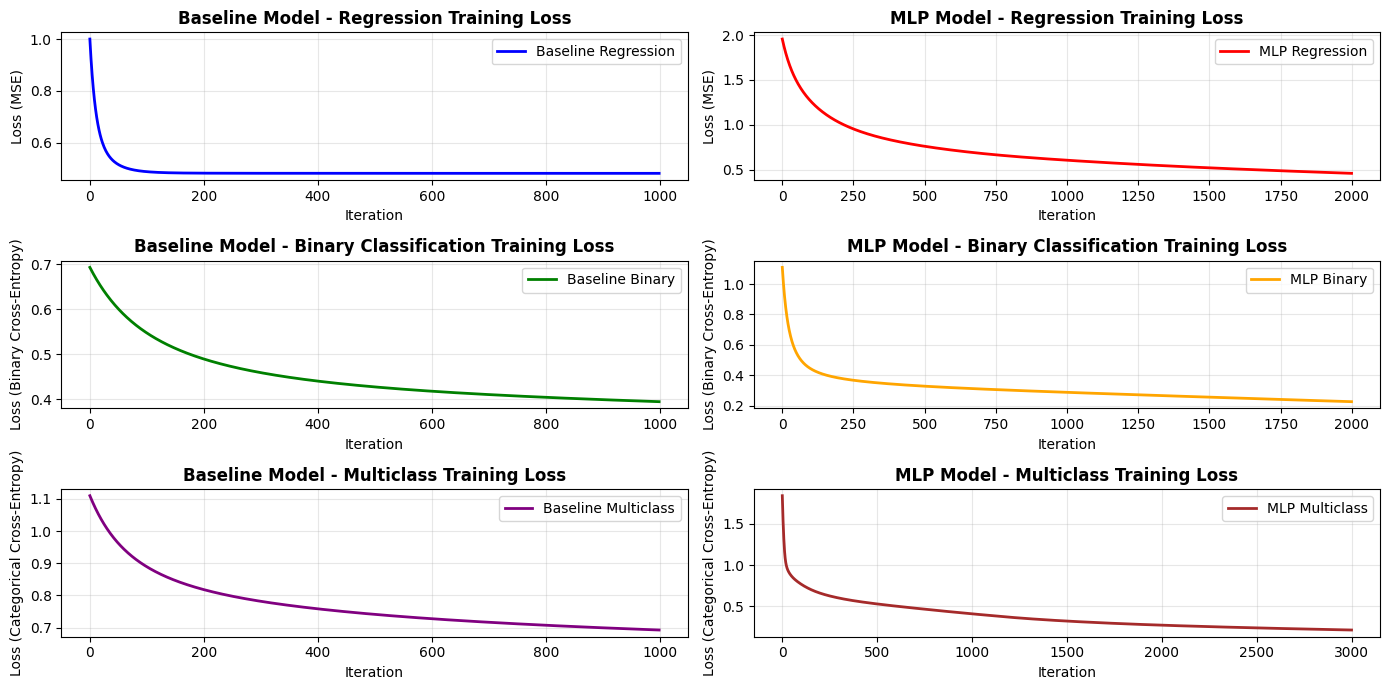

In [23]:
# 1. Training loss curves
plt.figure(figsize=(14, 7))

# ===== REGRESSION =====
# Baseline Regression Loss
plt.subplot(3, 2, 1)
plt.plot(reg_baseline.loss_history, label='Baseline Regression', color='blue', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (MSE)', fontsize=10)
plt.title('Baseline Model - Regression Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# MLP Regression Loss
plt.subplot(3, 2, 2)
plt.plot(reg_mlp.loss_history, label='MLP Regression', color='red', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (MSE)', fontsize=10)
plt.title('MLP Model - Regression Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# ===== BINARY CLASSIFICATION =====
# Baseline Binary Loss
plt.subplot(3, 2, 3)
plt.plot(bin_baseline.loss_history, label='Baseline Binary', color='green', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=10)
plt.title('Baseline Model - Binary Classification Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# MLP Binary Loss
plt.subplot(3, 2, 4)
plt.plot(bin_mlp.loss_history, label='MLP Binary', color='orange', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=10)
plt.title('MLP Model - Binary Classification Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# ===== MULTICLASS CLASSIFICATION =====
# Baseline Multiclass Loss
plt.subplot(3, 2, 5)
plt.plot(multi_baseline.loss_history, label='Baseline Multiclass', color='purple', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Categorical Cross-Entropy)', fontsize=10)
plt.title('Baseline Model - Multiclass Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# MLP Multiclass Loss
plt.subplot(3, 2, 6)
plt.plot(multi_mlp.loss_history, label='MLP Multiclass', color='brown', linewidth=2)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Loss (Categorical Cross-Entropy)', fontsize=10)
plt.title('MLP Model - Multiclass Training Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

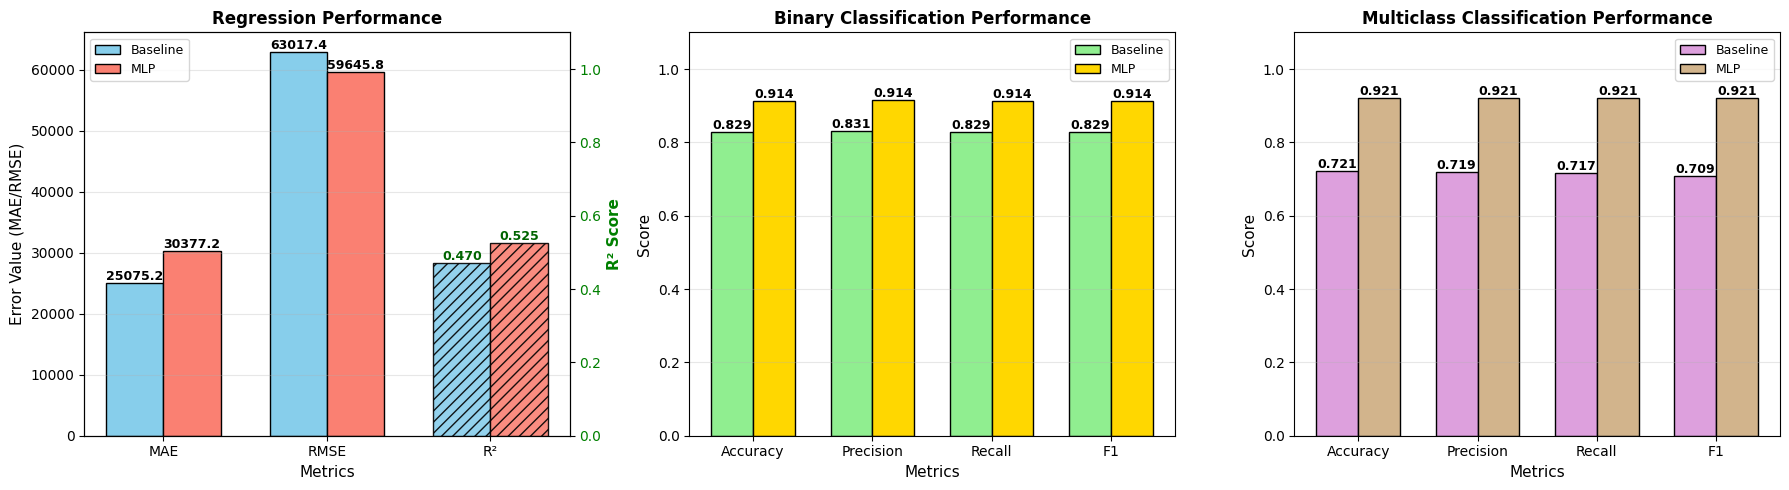

In [24]:
# 2. Performance comparison bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

width = 0.35

# ===== REGRESSION=====
ax1 = axes[0]

# Create primary axis for MAE and RMSE
metrics_reg = ['MAE', 'RMSE', 'R²']
baseline_error = [reg_base_mae, reg_base_rmse, 0]  # Set R² to 0 for primary axis
mlp_error = [reg_mlp_mae, reg_mlp_rmse, 0]  # Set R² to 0 for primary axis
x = np.arange(len(metrics_reg))

bars1 = ax1.bar(x[:2] - width/2, baseline_error[:2], width, label='Baseline', color='skyblue', edgecolor='black')
bars2 = ax1.bar(x[:2] + width/2, mlp_error[:2], width, label='MLP', color='salmon', edgecolor='black')

ax1.set_xlabel('Metrics', fontsize=11)
ax1.set_ylabel('Error Value (MAE/RMSE)', fontsize=11)
ax1.set_title('Regression Performance', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_reg)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels for MAE and RMSE
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Create secondary y-axis for R²
ax1_twin = ax1.twinx()
baseline_r2_vals = [reg_base_r2]
mlp_r2_vals = [reg_mlp_r2]

bars3 = ax1_twin.bar(x[2] - width/2, baseline_r2_vals[0], width, color='skyblue', 
                     edgecolor='black', alpha=0.9, hatch='///')
bars4 = ax1_twin.bar(x[2] + width/2, mlp_r2_vals[0], width, color='salmon', 
                     edgecolor='black', alpha=0.9, hatch='///')

ax1_twin.set_ylabel('R² Score', fontsize=11, color='green', fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='green')
ax1_twin.set_ylim([0, 1.1])

# Add value labels for R²
bar3 = bars3[0]
bar4 = bars4[0]

ax1_twin.text(bar3.get_x() + bar3.get_width()/2., bar3.get_height(),
              f'{reg_base_r2:.3f}', ha='center', va='bottom', fontsize=9, 
              fontweight='bold', color='darkgreen')
ax1_twin.text(bar4.get_x() + bar4.get_width()/2., bar4.get_height(),
              f'{reg_mlp_r2:.3f}', ha='center', va='bottom', fontsize=9, 
              fontweight='bold', color='darkgreen')

# Add legend
ax1.legend(loc='upper left', fontsize=9)

# ===== BINARY CLASSIFICATION =====
ax2 = axes[1]
metrics_bin = ['Accuracy', 'Precision', 'Recall', 'F1']
baseline_bin = [bin_base_acc, bin_base_prec, bin_base_rec, bin_base_f1]
mlp_bin = [bin_mlp_acc, bin_mlp_prec, bin_mlp_rec, bin_mlp_f1]
x = np.arange(len(metrics_bin))

bars1 = ax2.bar(x - width/2, baseline_bin, width, label='Baseline', color='lightgreen', edgecolor='black')
bars2 = ax2.bar(x + width/2, mlp_bin, width, label='MLP', color='gold', edgecolor='black')

ax2.set_xlabel('Metrics', fontsize=11)
ax2.set_ylabel('Score', fontsize=11)
ax2.set_title('Binary Classification Performance', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_bin)
ax2.set_ylim([0, 1.1])
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ===== MULTICLASS CLASSIFICATION =====
ax3 = axes[2]
metrics_multi = ['Accuracy', 'Precision', 'Recall', 'F1']
baseline_multi = [multi_base_acc, multi_base_prec, multi_base_rec, multi_base_f1]
mlp_multi = [multi_mlp_acc, multi_mlp_prec, multi_mlp_rec, multi_mlp_f1]
x = np.arange(len(metrics_multi))

bars1 = ax3.bar(x - width/2, baseline_multi, width, label='Baseline', color='plum', edgecolor='black')
bars2 = ax3.bar(x + width/2, mlp_multi, width, label='MLP', color='tan', edgecolor='black')

ax3.set_xlabel('Metrics', fontsize=11)
ax3.set_ylabel('Score', fontsize=11)
ax3.set_title('Multiclass Classification Performance', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_multi)
ax3.set_ylim([0, 1.1])
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [25]:
analysis_text = """
TODO: Write your analysis here (minimum 200 words)

Address these questions:
1. Which model performed better and by how much?
2. Why do you think one model outperformed the other?
3. What was the computational cost difference (training time)?
4. Any surprising findings or challenges you faced?
5. What insights did you gain about neural networks vs linear models?

Write your thoughtful analysis here. Be specific and reference your actual results.
Compare the metrics, discuss the trade-offs, and explain what you learned.
"""

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 82 words
⚠️  Warning: Analysis should be at least 200 words


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.


⭐⭐⭐ REQUIRED: Structured Output Function ⭐⭐⭐

### 🚨 CRITICAL - READ CAREFULLY 🚨

1. **Fill in ALL fields** - Missing fields = 0 marks
2. **Use your actual values** - Not 0 or empty strings
3. **This cell MUST be executed** - We need the output!
4. **Print the results** - Auto-grader needs to see output!


**DO NOT:**
- Leave any field as 0, 0.0,
- Clear outputs before submission
- Modify the structure


"**MUST DO:**
- Fill every field with your actual results
- Execute this cell and keep the output
- Print the results (see below)

In [26]:
def get_assignment_results():
    '''
    CRITICAL: Fill ALL fields with your actual results!
    Missing fields will result in 0 marks for that section.
    '''

    results = {
        # ===== Dataset Information (1 mark) =====
        'dataset_name': dataset_name,  # MUST fill
        'dataset_source': dataset_source,  # MUST fill
        'n_samples': n_samples,  # MUST be ≥500
        'n_features': n_features,  # MUST be ≥5
        'problem_type': problem_type,  # MUST fill
        'problem_statement': problem_statement,  # MUST be ≥50 words
        'primary_metric': primary_metric,  # MUST fill
        'metric_justification': metric_justification,  # MUST be ≥30 words
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Model (3 marks) =====
        'baseline_model': {
            'model_type': '',  # 'linear_regression', 'logistic_regression', 'softmax_regression'
            'learning_rate': 0.01,  # Your learning rate
            'n_iterations': 1000,  # Your iterations

            # CRITICAL: These MUST be filled!
            'initial_loss': baseline_initial_loss,  # MUST NOT be 0
            'final_loss': baseline_final_loss,  # MUST NOT be 0
            'training_time_seconds': baseline_training_time,  # MUST NOT be 0
            'loss_decreased': baseline_final_loss < baseline_initial_loss,  # Auto-calculated

            # Metrics - Fill based on your problem type
            'test_accuracy': 0.0 if problem_type == 'regression' else baseline_acc,
            'test_precision': 0.0 if problem_type == 'regression' else baseline_prec,
            'test_recall': 0.0 if problem_type == 'regression' else baseline_rec,
            'test_f1': 0.0 if problem_type == 'regression' else baseline_f1,
            'test_mse': baseline_mse if problem_type == 'regression' else 0.0,
            'test_rmse': baseline_rmse if problem_type == 'regression' else 0.0,
            'test_mae': baseline_mae if problem_type == 'regression' else 0.0,
            'test_r2': baseline_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== MLP Model (4 marks) =====
        'mlp_model': {
            'architecture': mlp_architecture,  # MUST have ≥3 elements
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'learning_rate': 0.01,
            'n_iterations': 1000,

            # CRITICAL: These MUST be filled!
            'initial_loss': mlp_initial_loss,  # MUST NOT be 0
            'final_loss': mlp_final_loss,  # MUST NOT be 0
            'training_time_seconds': mlp_training_time,  # MUST NOT be 0
            'loss_decreased': mlp_final_loss < mlp_initial_loss,  # Auto-calculated

            # Metrics
            'test_accuracy': 0.0 if problem_type == 'regression' else mlp_acc,
            'test_precision': 0.0 if problem_type == 'regression' else mlp_prec,
            'test_recall': 0.0 if problem_type == 'regression' else mlp_rec,
            'test_f1': 0.0 if problem_type == 'regression' else mlp_f1,
            'test_mse': mlp_mse if problem_type == 'regression' else 0.0,
            'test_rmse': mlp_rmse if problem_type == 'regression' else 0.0,
            'test_mae': mlp_mae if problem_type == 'regression' else 0.0,
            'test_r2': mlp_r2 if problem_type == 'regression' else 0.0,
        },

        # ===== Analysis (2 marks) =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
    }

    return results

# ===== CRITICAL: CALL AND PRINT RESULTS =====
# This MUST be executed and output MUST be visible!
import json
results = get_assignment_results()
print(json.dumps(results, indent=2))

# ===== Validation =====
print("\n" + "="*60)
print("VALIDATION CHECK")
print("="*60)


errors = []

if results['n_samples'] < 500:
    errors.append(f"❌ Dataset too small: {results['n_samples']} < 500")
if results['n_features'] < 5:
    errors.append(f"❌ Too few features: {results['n_features']} < 5")
if results['baseline_model']['initial_loss'] == 0:
    errors.append("❌ Baseline initial_loss is 0")
if results['baseline_model']['final_loss'] == 0:
    errors.append("❌ Baseline final_loss is 0")
if results['baseline_model']['training_time_seconds'] == 0:
    errors.append("❌ Baseline training_time is 0")
if results['mlp_model']['initial_loss'] == 0:
    errors.append("❌ MLP initial_loss is 0")
if results['mlp_model']['final_loss'] == 0:
    errors.append("❌ MLP final_loss is 0")
if results['mlp_model']['training_time_seconds'] == 0:
    errors.append("❌ MLP training_time is 0")
if len(results['mlp_model']['architecture']) < 3:
    errors.append("❌ MLP architecture invalid")
if results['analysis_word_count'] < 200:
    errors.append(f"❌ Analysis too short: {results['analysis_word_count']} < 200 words")

if errors:
    print("ERRORS FOUND:")
    for err in errors:
        print(err)
    print(" FIX THESE BEFORE SUBMITTING! ")
else:
    print("✅ All validation checks passed!")
    print("✅ Ready to submit!")
    print("Next steps:")
    print("1. Kernel → Restart & Clear Output")
    print("2. Kernel → Restart & Run All")
    print("3. Verify this output is visible")
    print("4. Save notebook")
    print("5. Rename as: YourStudentID_assignment.ipynb")
    print("6. Submit to LMS")

NameError: name 'baseline_training_time' is not defined

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [ ]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2))
    print("\n" + "="*70)


    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

**Good luck! **